# Data Preparation and Augmentation

In [1]:
import os
import sys

parent = os.path.dirname(os.path.dirname(os.getcwd()))
if parent not in sys.path:
    sys.path.append(parent)

In [2]:
import numpy as np
import torch
from PIL import Image
from torchvision.transforms.functional import to_tensor
from matplotlib import pyplot as plt

# Image Normalization

Normalizes the image so that the colouring of H&E stains are consistent

In [3]:
img_path = os.path.join(parent,"data", "processed", "MoNuSeg_TRAIN", "images", "2.tif")
img_PIL = Image.open(img_path)
img_tensor = to_tensor(img_PIL)

In [4]:
from src.transforms.he_normalize import normalize_he_image,get_stain_vectors, normalize_vec

norm = normalize_he_image(img_tensor)

tensor([[0.7071, 0.0000],
        [0.0000, 0.7071],
        [0.7071, 0.7071]])
tensor([[ 0.0588,  0.0609,  0.0571,  ...,  0.0912,  0.0894,  0.0915],
        [-0.0074, -0.0164, -0.0117,  ...,  0.0224,  0.0301,  0.0461]])


In [5]:
h,e = get_stain_vectors(img_tensor)
print(h)
print(e)

tensor([1.0000e+00, 2.8970e-05, 5.5812e-05])
tensor([9.7274e-01, 9.6131e-05, 2.3191e-01])


In [6]:
print(normalize_vec(-torch.log10(h)))

tensor([-0.0000, 0.7296, 0.6838])


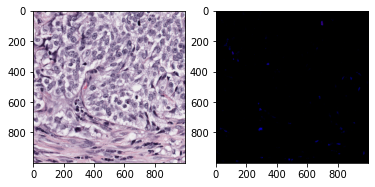

In [7]:
from src.utilities.img_utilities import tensor_to_numpy

reference_img = tensor_to_numpy(img_tensor)
normalized_img = tensor_to_numpy(norm)

f,ax = plt.subplots(1,2)
ax[0].imshow(reference_img)
ax[1].imshow(normalized_img)
plt.show()